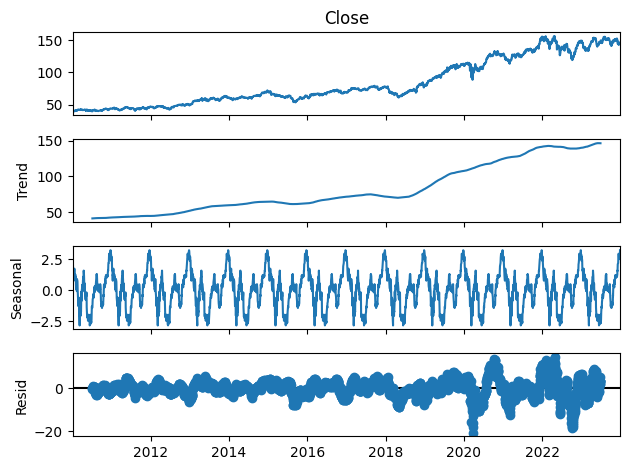

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# define ticker symbol 
tickerSymbol = 'PG'

# Get data from ticker 
tickerData = yf.Ticker(tickerSymbol)

# get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2023-12-31') # adjust dates as needed

# Decompose the closing price to trend, seasonal and residual components
decompose_results = seasonal_decompose(tickerDf['Close'], model='additive', period=252)# 252 trading days in a year

# ploting the decomposed components
decompose_results.plot()
plt.show()

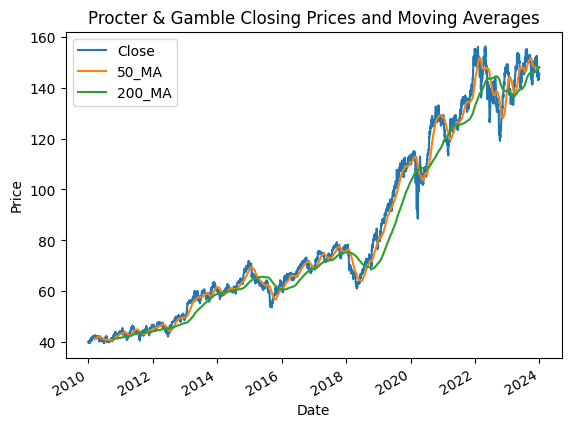

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# define ticker symbol 
tickerSymbol = "PG"

# get data for ticker symbol
tickerData = yf.Ticker(tickerSymbol)

# defining dates from which we want to get data from
tickerDf = tickerData.history(period="1d", start="2010-1-1", end="2023-12-31")

# calculate 50-day and 200-day moving averages
tickerDf['50_MA'] = tickerDf['Close'].rolling(window=50).mean()
tickerDf['200_MA'] = tickerDf['Close'].rolling(window=200).mean()

# plot the closing price along with the moving averages
tickerDf[['Close','50_MA','200_MA']].plot(title='Procter & Gamble Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

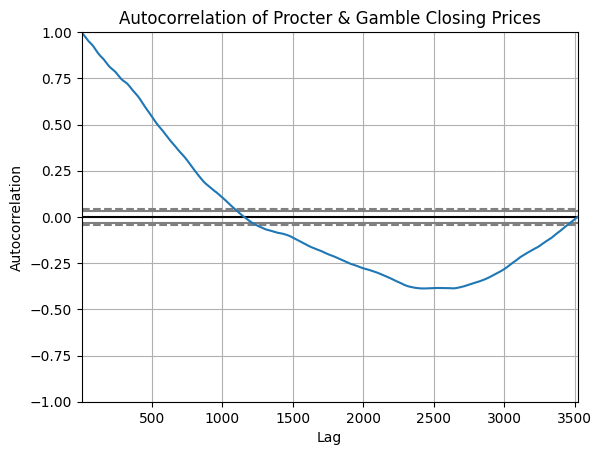

In [3]:
from pandas.plotting import autocorrelation_plot

# plot autocorrelation for closing prices
autocorrelation_plot(tickerDf['Close'])
plt.title('Autocorrelation of Procter & Gamble Closing Prices')
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

# perform dickey-fuller test
adf_test = adfuller(tickerDf['Close'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.308295
p-value: 0.924321
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
